In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set()

In [2]:
# prve tri su zo stranky https://volby.sme.sk/pref/1/politicke-strany
# a vlastne aj posledny (druhy od NMS) je tam tiez uz

preferences_focus = { # 17.09, 1001 respondentov
    'SMER-SD': 0.189,
    'PS': 0.165,
    'HLAS': 0.146,
    'Republika': 0.080,
    'SNS': 0.064,
    'OĽANO, KÚ, Za ľudí': 0.063,
    'KDH': 0.062,
    'SAS': 0.051,
    'SME RODINA': 0.049,
    'Demokrati': 0.037,
    'Aliancia': 0.036,
    'ĽSNS': 0.018,
    'Modrí, Most-Hid': 0.015,
    'MF, ODS, ZR': 0.008
}
data_size_focus = 1001

preferences_ako = { # 14.09, 1000 respondentov
    'SMER-SD': 0.194,
    'PS': 0.182,
    'HLAS': 0.151,
    'Republika': 0.052,
    'SNS': 0.06,
    'OĽANO, KÚ, Za ľudí': 0.07,
    'KDH': 0.06,
    'SAS': 0.074,
    'SME RODINA': 0.053,
    'Demokrati': 0.035,
    'Aliancia': 0.029,
    'ĽSNS': 0.006,
    'Modrí, Most-Hid': 0.014,
    'MF, ODS, ZR': 0.000
}
data_size_ako = 1000

preferences_nms1 = { # 14.09, 1410 respondentov
    'SMER-SD': 0.22,
    'PS': 0.181,
    'HLAS': 0.114,
    'Republika': 0.083,
    'SNS': 0.073,
    'OĽANO, KÚ, Za ľudí': 0.061,
    'KDH': 0.047,
    'SAS': 0.042,
    'SME RODINA': 0.058,
    'Demokrati': 0.038,
    'Aliancia': 0.032,
    'ĽSNS': 0.01,
    'Modrí, Most-Hid': 0.009,
    'MF, ODS, ZR': 0.004
}
data_size_nms1 = 1410

preferences_nms2 = { # 26.09, 1411 respondentov
    'SMER-SD': 0.194,
    'PS': 0.197,
    'HLAS': 0.105,
    'Republika': 0.085,
    'SNS': 0.054,
    'OĽANO, KÚ, Za ľudí': 0.095,
    'KDH': 0.054,
    'SAS': 0.057,
    'SME RODINA': 0.052,
    'Demokrati': 0.023,
    'Aliancia': 0.031,
    'ĽSNS': 0.018,
    'Modrí, Most-Hid': 0.011,
    'MF, ODS, ZR': 0.003
}
data_size_nms2 = 1411

# zdroj: https://spravy.pravda.sk/parlamentne-volby-2023/clanok/682178-prieskum-ipsosu-kollarov-pad-a-rast-olano-po-volbach-hrozi-koalicny-pat-jazyckom-na-vahach-bude-hlas/
preferences_ipsos = { # 1026 respondentov
    'SMER-SD': 0.203,
    'PS': 0.172,
    'HLAS': 0.131,
    'Republika': 0.086,
    'SNS': 0.056,
    'OĽANO, KÚ, Za ľudí': 0.082,
    'KDH': 0.052,
    'SAS': 0.061,
    'SME RODINA': 0.042,
    'Demokrati': 0.034,
    'Aliancia': 0.04,
    'ĽSNS': 0.00,
    'Modrí, Most-Hid': 0.000,
    'MF, ODS, ZR': 0.000
}
data_size_ipsos = 1026

# zdroj: https://volby.sme.sk/pref/1/politicke-strany/p/ako
preferences_ako2 = { # 27.09, 1000 respondentov
    'SMER-SD': 0.177,
    'PS': 0.180,
    'HLAS': 0.150,
    'Republika': 0.054,
    'SNS': 0.060,
    'OĽANO, KÚ, Za ľudí': 0.094,
    'KDH': 0.061,
    'SAS': 0.073,
    'SME RODINA': 0.051,
    'Demokrati': 0.043,
    'Aliancia': 0.028,
    'ĽSNS': 0.000,
    'Modrí, Most-Hid': 0.010,
    'MF, ODS, ZR': 0.006
}
data_size_ako2 = 1000

# zdroj: https://volby.sme.sk/pref/1/politicke-strany/p/ako
preferences_focus2 = { # 26.09, 1017 respondentov
    'SMER-SD': 0.180,
    'PS': 0.166,
    'HLAS': 0.137,
    'Republika': 0.077,
    'SNS': 0.064,
    'OĽANO, KÚ, Za ľudí': 0.082,
    'KDH': 0.065,
    'SAS': 0.058,
    'SME RODINA': 0.041,
    'Demokrati': 0.040,
    'Aliancia': 0.035,
    'ĽSNS': 0.017,
    'Modrí, Most-Hid': 0.007,
    'MF, ODS, ZR': 0.006
}
data_size_focus2 = 1017


# zdroj: https://spravy.rtvs.sk/2023/09/posledny-prieskum-pre-rtvs-tesny-suboj-o-prvenstvo-medzi-lidrami-je-len-minimalny-rozdiel/
preferences_median = { # 27.09, 1004 respondentov
    'SMER-SD': 0.198,
    'PS': 0.193,
    'HLAS': 0.119,
    'Republika': 0.080,
    'SNS': 0.048,
    'OĽANO, KÚ, Za ľudí': 0.062,
    'KDH': 0.077,
    'SAS': 0.074,
    'SME RODINA': 0.041,
    'Demokrati': 0.038,
    'Aliancia': 0.025,
    'ĽSNS': 0.000,
    'Modrí, Most-Hid': 0.021,
    'MF, ODS, ZR': 0.000
}
data_size_median = 1004

# zdroj:
preferences_ipsos2 = { # 27.09, 1000 respondentov
    'SMER-SD': 0.206,
    'PS': 0.198,
    'HLAS': 0.119,
    'Republika': 0.076,
    'SNS': 0.057,
    'OĽANO, KÚ, Za ľudí': 0.082,
    'KDH': 0.059,
    'SAS': 0.070,
    'SME RODINA': 0.040,
    'Demokrati': 0.033,
    'Aliancia': 0.034,
    'ĽSNS': 0.016,
    'Modrí, Most-Hid': 0.006,
    'MF, ODS, ZR': 0.001
}
data_size_ipsos2 = 1026


In [3]:
parties_names = tuple(preferences_focus.keys())
N = len(parties_names)

prior_weights = np.ones(N)

data = [
    (preferences_focus, data_size_focus),
    (preferences_ako, data_size_ako),
    (preferences_nms1, data_size_nms1),
    (preferences_nms2, data_size_nms2),
    (preferences_ipsos, data_size_ipsos),
    (preferences_ako2, data_size_ako2),
    (preferences_focus2, data_size_focus2),
    (preferences_median, data_size_median),
    (preferences_ipsos2, data_size_ipsos2),
]

posterior_weights = prior_weights.copy()

for preferences, data_size in data:
  weights = np.array([preferences[name] * data_size for name in parties_names])
  posterior_weights = posterior_weights + weights

print(posterior_weights)

[1946.609 1803.556 1272.346  748.886  593.406  762.024  583.825  606.386
  476.194  349.644  319.516   98.221  102.585   32.009]


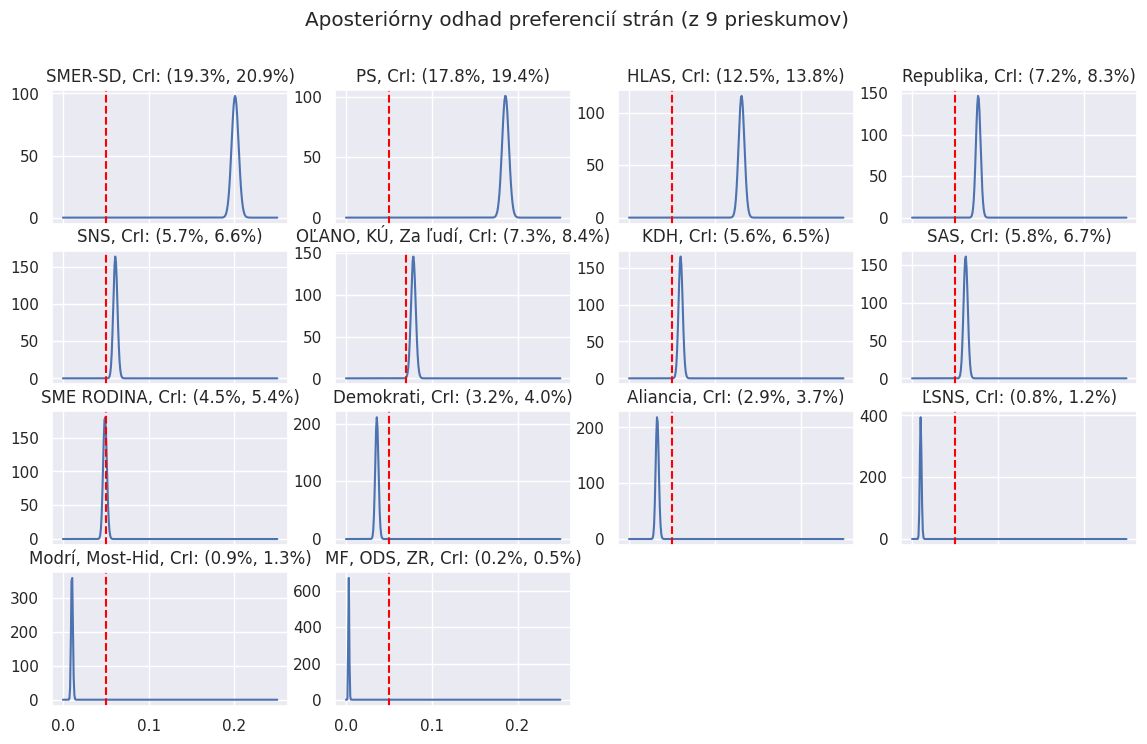

In [4]:
NCOLS = 4
fig, ax = plt.subplots(
    ncols=NCOLS,
    nrows=int(math.ceil(N/NCOLS)),
    figsize=(14, 8),
    sharex=True)

xs = np.linspace(0, 0.25, num=300)
for i, name in enumerate(parties_names):
  a = posterior_weights[i]
  b = np.sum(posterior_weights) - a
  ys = scipy.stats.beta.pdf(xs, a=a, b=b) # marginalne rozdelenie pre Dirichletovo je Beta rozdelenie
  ax[i // NCOLS][i % NCOLS].plot(xs, ys)
  ax[i // NCOLS][i % NCOLS].axvline(0.05 if name != 'OĽANO, KÚ, Za ľudí' else 0.07, color="red", linestyle="dashed")
  ax[i // NCOLS][i % NCOLS].set_title(f"{name}, CrI: ({scipy.stats.beta.isf(0.975, a=a, b=b)*100:.1f}%, {scipy.stats.beta.isf(0.025, a=a, b=b)*100:.1f}%)")

for i in range(N, int(math.ceil(N/NCOLS)) * NCOLS):
  fig.delaxes(ax[i // NCOLS][i % NCOLS])

fig.suptitle(f"Aposteriórny odhad preferencií strán (z {len(data)} prieskumov)")
fig.show()

In [5]:
# ako to previest na pocty hlasov a nasledne na pocty stoliciek?
# zdroj: https://dennikn.sk/1775846/myty-a-fakty-o-pridelovani-mandatov-pri-parlamentnych-volbach/

def sample_vote_counts(alphas, vote_count=4.334 * (10**6) * 0.658):
  """Sample from a Dirichlet-Multinomial distribution.
  Number of votes = 4.334 millions of potential voters * 65.8% of votes in year 2020
  """
  props = scipy.stats.dirichlet.rvs(alphas)[0]
  counts = scipy.stats.multinomial.rvs(vote_count, props, size=1)[0]
  return counts

def get_chair_count_from_votes(votes):
  global parties_names
  raw_proportions = votes / np.sum(votes)
  updated_votes = np.array([votes[i] if raw_proportions[i] >= (0.05 if parties_names[i] != 'OĽANO, KÚ, Za ľudí' else 0.07) else 0 for i in range(len(votes))])
  chair_cost = int(np.sum(updated_votes) / 151)
  chair_count = np.array([votes // chair_cost for votes in updated_votes])
  return chair_count

# votes = sample_vote_counts(posterior_weights)
# chairs = get_chair_count_from_votes(votes)

sample_count = 1_000_000

samples = np.array([get_chair_count_from_votes(sample_vote_counts(posterior_weights)) for _ in range(sample_count)])
print(samples)

[[35 32 23 ...  0  0  0]
 [33 30 21 ...  0  0  0]
 [36 32 23 ...  0  0  0]
 ...
 [35 32 24 ...  0  0  0]
 [33 31 21 ...  0  0  0]
 [35 33 23 ...  0  0  0]]


SMER-SD [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 6.30000e-05 7.04500e-03 9.68760e-02 1.98870e-01 2.40840e-01 3.40514e-01
 1.08828e-01 6.55800e-03 2.43000e-04 1.32000e-04 2.80000e-05 3.00000e-06
 0.00000e+00 0.00000e+00]
PS [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 5.50000e-04 2.81630e-02
 1.68013e-01 2.18248e-01 3.50965e-01 2.11075e-01 2.22260e-02 5.68000e-04
 1.59000e-04 3

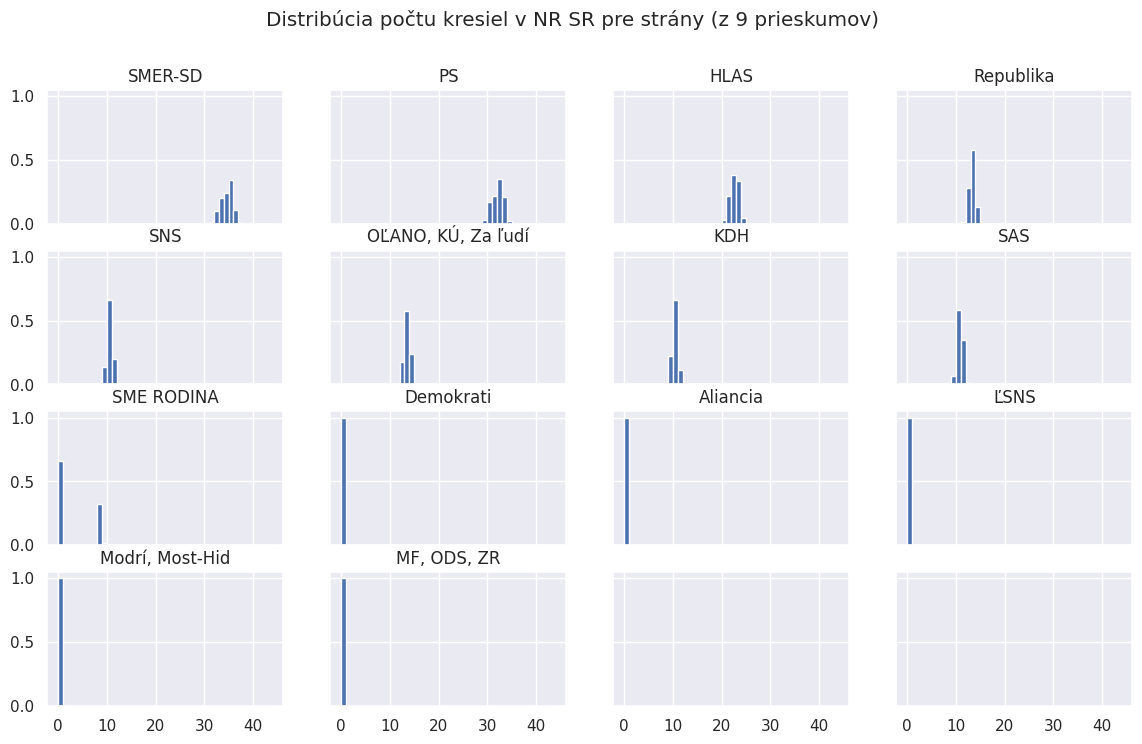

In [6]:
bins = np.arange(45)
NCOLS = 4

fig, ax = plt.subplots(
    ncols=NCOLS,
    nrows=int(math.ceil(N/NCOLS)),
    figsize=(14, 8),
    sharex=True,
    sharey=True)

for i, name in enumerate(parties_names):
  counts, bins, bars = ax[i // NCOLS][i % NCOLS].hist(samples[:, i], bins=bins, density=True)
  ax[i // NCOLS][i % NCOLS].set_title(f"{name}")
  print(name, counts)

fig.suptitle(f"Distribúcia počtu kresiel v NR SR pre strány (z {len(data)} prieskumov)")
fig.show()

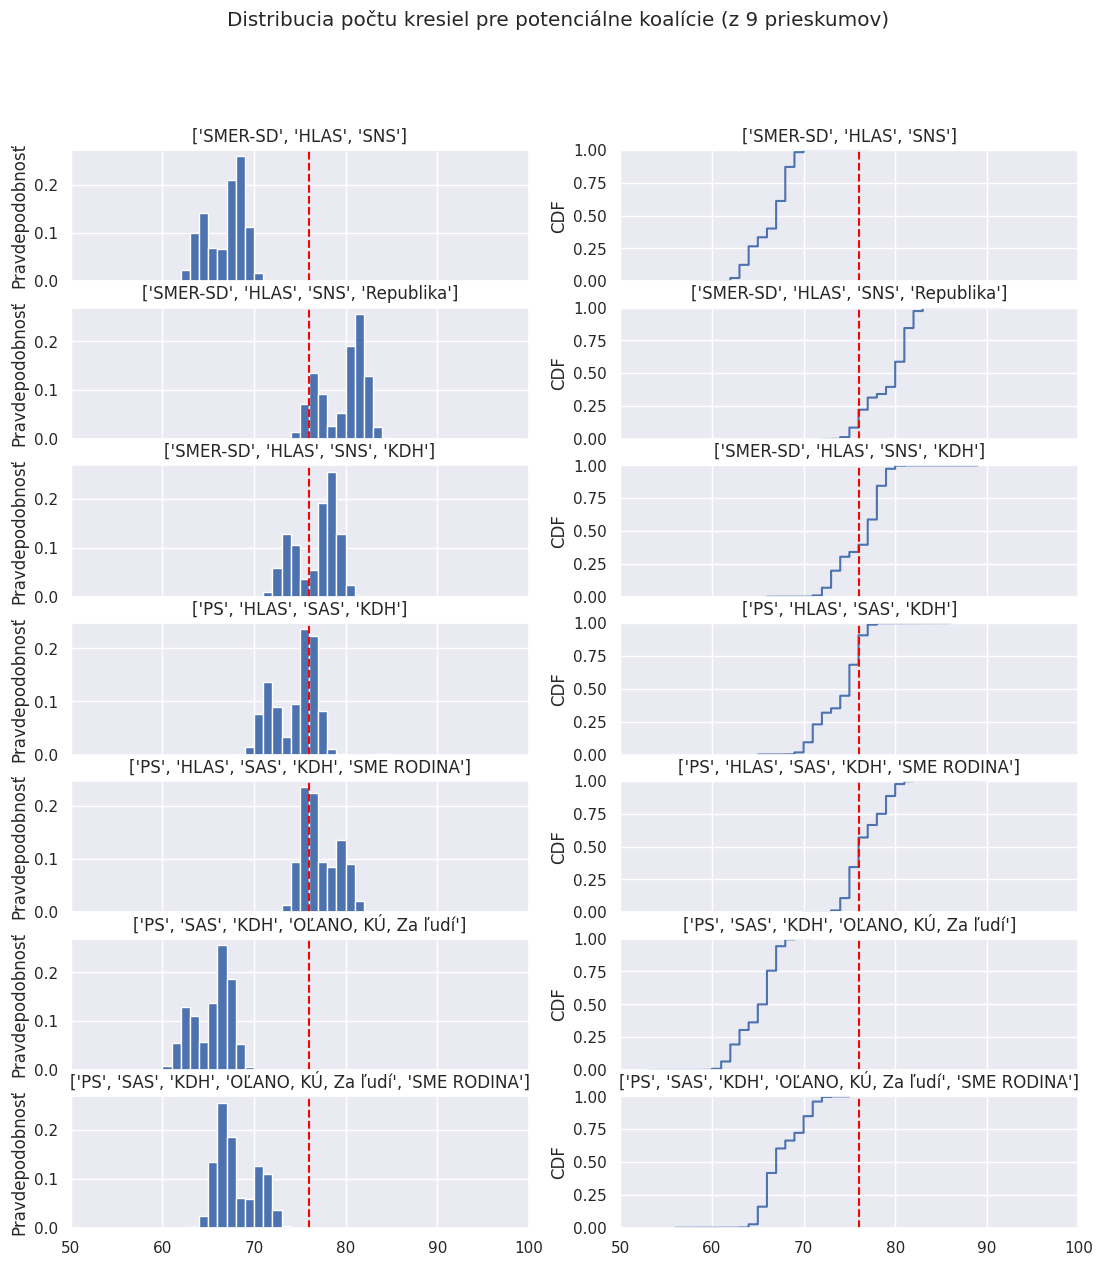

In [7]:
# sucty pre koalicie
koalicie = [
    ["SMER-SD", "HLAS", "SNS"],
    ["SMER-SD", "HLAS", "SNS", "Republika"],
    ["SMER-SD", "HLAS", "SNS", "KDH"],
    ["PS", "HLAS", "SAS", "KDH"],
    ["PS", "HLAS", "SAS", "KDH", 'SME RODINA'],
    ["PS", "SAS", "KDH", 'OĽANO, KÚ, Za ľudí'],
    ["PS", "SAS", "KDH", 'OĽANO, KÚ, Za ľudí', 'SME RODINA'],
  ]

fig, ax = plt.subplots(nrows=len(koalicie), ncols=2, figsize=(13, 2*len(koalicie)), sharex=True)
for i, koalicia in enumerate(koalicie):
  assert all(strana in parties_names for strana in koalicia)
  koalicia_vec = np.array([1 if name in koalicia else 0 for name in parties_names])
  chair_count_per_sample = np.dot(samples, koalicia_vec)
  ax[i][0].hist(chair_count_per_sample, bins=np.arange(50, 100), density=True)
  ax[i][0].set_title(f"{koalicia}")
  ax[i][0].axvline(76, linestyle="dashed", color="red")
  sns.ecdfplot(ax=ax[i][1], data=chair_count_per_sample)
  ax[i][1].set_title(f"{koalicia}")
  ax[i][1].axvline(76, linestyle="dashed", color="red")
  ax[i][1].set_xlim(50, 100)
  ax[i][1].set_ylabel("CDF")
  ax[i][0].set_ylabel("Pravdepodobnosť")

fig.suptitle(f"Distribucia počtu kresiel pre potenciálne koalície (z {len(data)} prieskumov)")
fig.show()